In [49]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
from functions import *

In [50]:
path='../data/raw/Uncleaned_DS_jobs.csv'
df = pd.read_csv(path)

### Initial Analysis

In [51]:
col_df=df.columns
print(col_df)

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')


In [52]:
type=df.dtypes
for col in col_df:
    print(f' the type of the column {col} is: {type.loc[col]}')

 the type of the column index is: int64
 the type of the column Job Title is: object
 the type of the column Salary Estimate is: object
 the type of the column Job Description is: object
 the type of the column Rating is: float64
 the type of the column Company Name is: object
 the type of the column Location is: object
 the type of the column Headquarters is: object
 the type of the column Size is: object
 the type of the column Founded is: int64
 the type of the column Type of ownership is: object
 the type of the column Industry is: object
 the type of the column Sector is: object
 the type of the column Revenue is: object
 the type of the column Competitors is: object


In [53]:
df.nunique()

index                672
Job Title            172
Salary Estimate       30
Job Description      489
Rating                32
Company Name         432
Location             207
Headquarters         229
Size                   9
Founded              103
Type of ownership     13
Industry              58
Sector                23
Revenue               14
Competitors          108
dtype: int64

In [54]:
null_values_origin=df.isna().sum()
for col in col_df:
    print(f' the missing values of the column {col} : {null_values_origin.loc[col]}')

 the missing values of the column index : 0
 the missing values of the column Job Title : 0
 the missing values of the column Salary Estimate : 0
 the missing values of the column Job Description : 0
 the missing values of the column Rating : 0
 the missing values of the column Company Name : 0
 the missing values of the column Location : 0
 the missing values of the column Headquarters : 0
 the missing values of the column Size : 0
 the missing values of the column Founded : 0
 the missing values of the column Type of ownership : 0
 the missing values of the column Industry : 0
 the missing values of the column Sector : 0
 the missing values of the column Revenue : 0
 the missing values of the column Competitors : 0


#### Relevant Data Quality Issues

In [55]:
df.Industry.value_counts()

Industry
-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

In [56]:
df['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [57]:
df.Industry.unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [58]:
df['Salary Estimate'].unique

<bound method Series.unique of 0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, Length: 672, dtype: object>

### Data Cleaning Process

In [59]:
df_clean=general_cleaning(df)
df_clean.shape
print(f'After uniformating column names and removing duplicates, the data set has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns')

After uniformating column names and removing duplicates, the data set has 672 rows and 15 columns


#### Placeholder: Replacing -1 with numpy.nan

In [60]:
print(' To provide the missing indicator, the -1 values are replaced with numpy.nan')
df_clean.replace({-1:np.nan,'-1': np.nan}, inplace=True)

 To provide the missing indicator, the -1 values are replaced with numpy.nan


In [61]:
columns=df_clean.columns
null_values=df_clean.isna().sum()
for col in columns:
    print(f' the missing values of the column {col} : {null_values.loc[col]}')

 the missing values of the column index : 0
 the missing values of the column job_title : 0
 the missing values of the column salary_estimate : 0
 the missing values of the column job_description : 0
 the missing values of the column rating : 50
 the missing values of the column company_name : 0
 the missing values of the column location : 0
 the missing values of the column headquarters : 31
 the missing values of the column size : 27
 the missing values of the column founded : 118
 the missing values of the column type_of_ownership : 27
 the missing values of the column industry : 71
 the missing values of the column sector : 71
 the missing values of the column revenue : 27
 the missing values of the column competitors : 501


#### Tailored functions for cleaing the columns


In [62]:
df_clean['job_cleaned']=df_clean.job_title.apply(cleaning_job_title)
print(f"\nIn the original dataset the job titles had \033[1m {df['Job Title'].nunique()}\033[0m uniqe values")
print(f'After uniformating and recategorizing the Jobs titles and handling the irrelevant information,\nwe were able to reduce the amount of the unique values.\n\nThe job titles are now categorized in the follwoing \033[1m{df_clean.job_cleaned.nunique()}\033[0m groups:')
print(df_clean.job_cleaned.unique())


In the original dataset the job titles had  172 uniqe values
After uniformating and recategorizing the Jobs titles and handling the irrelevant information,
we were able to reduce the amount of the unique values.

The job titles are now categorized in the follwoing 8 groups:
['data_scientist' 'others' 'data_analyst' 'data_engineer'
 'machine_learning_engineer' 'senior_data_scientist'
 'data_science_analytics_leadership' 'computational_scientist']


In [63]:
df_clean['indu_cl'] = df_clean['industry'].apply(cleaning_industry)
print(f"\nIn the original dataset the industry column had \033[1m{df['Industry'].nunique()}\033[0m uniqe values")
print(f'\nAfter uniformating and recategorizing the Jobs titles and handling the irrelevant information,\nwe were able to reduce the amount of the unique values.\nThe job titles are now categorized in the follwoing \033[1m{df_clean.indu_cl.nunique()}\033[0m groups:')
print(f'{df_clean.indu_cl.unique()}\n')


In the original dataset the industry column had 58 uniqe values

After uniformating and recategorizing the Jobs titles and handling the irrelevant information,
we were able to reduce the amount of the unique values.
The job titles are now categorized in the follwoing 16 groups:
['insurance_agencies' 'others' 'consulting' 'manufacturing'
 'advertising_marketing' 'computer_hardware_software'
 'enterprise_software_network_solutions ' 'energy_and_utilities'
 'government_public_sector' 'internet_telephone_providers'
 'healthcare_and_pharmaceuticals' 'finance_and_banking'
 'staffing_outsourcing' 'transportation_logistics'
 'telecommunications_services' 'real_estate_construction']



##### Cleanign the locations and the headquarters

In [64]:
df_clean['location_cleaned']=df_clean.location.apply(cleaning_locations)
print(f'\nthe location had \033[1m{df.Location.isna().sum()}\033[0m missing values in the original dataset.')
print(f'After the cleanign process,the location column has \033[1m{df_clean.location_cleaned.nunique()}\033[0m unique values.\n')


the location had 0 missing values in the original dataset.
After the cleanign process,the location column has 207 unique values.



In [65]:
df_clean['headquarters_cleaned']=df_clean.headquarters.apply(cleaning_headquarters)

##### Cleanign the salary estimates

In [66]:
df_clean['sal_cleaned']=df_clean.salary_estimate.map(cleaning_salary)
print(f"\nIn the original dataset the salaries had \033[1m{df['Salary Estimate'].nunique()}\033[0m uniqe values")
print(f'After uniformating,the salaries are now categorized in the follwoing \033[1m{df_clean.sal_cleaned.nunique()}\033[0m groups:')
print(df_clean.sal_cleaned.unique())


In the original dataset the salaries had 30 uniqe values
After uniformating,the salaries are now categorized in the follwoing 7 groups:
['120-200' '75-145' '90-170' '56-125' '140-225' '30-56' '210-335']


In [67]:
df_clean['revenue_cleaned']=df_clean.revenue.str.lower().str.replace('(usd)','').str.strip()
df_clean.revenue_cleaned = df_clean.revenue_cleaned.str.replace('unknown / non-applicable','unknown_non_applicable')
df_clean.revenue_cleaned =df_clean.revenue_cleaned.fillna('unknown_non_applicable')

replacement_dict = {
    '$1 to $2 billion': '1 to 2B',
    '$100 to $500 million': '100 to 500M',
    '$10+ billion': '10B+',
    '$2 to $5 billion': '2 to 5B',
    '$500 million to $1 billion': '500M to 1B',
    '$5 to $10 billion': '5 to 10B',
    '$10 to $25 million': '10 to 25M',
    '$25 to $50 million': '25 to 50M',
    '$50 to $100 million': '50 to 100M',
    '$1 to $5 million': '1 to 5M',
    '$5 to $10 million': '5 to 10M',
    'less than $1 million': 'less than 1M'
}

# Replace values in the column using the replacement dictionary
df_clean.revenue_cleaned = df_clean.revenue_cleaned.replace(replacement_dict)
print(f'\nAfter uniformating, the reveneus are now categorized in the bellow \033[1m{df_clean.revenue_cleaned.nunique()}\033[0m groups,\nwhile the missing or nonapplicable values were assigned as unknown / non-applicable:')
print(df_clean.revenue_cleaned.unique())


After uniformating, the reveneus are now categorized in the bellow 13 groups,
while the missing or nonapplicable values were assigned as unknown / non-applicable:
['unknown_non_applicable' '1 to 2B' '100 to 500M' '10B+' '2 to 5B'
 '500M to 1B' '5 to 10B' '10 to 25M' '25 to 50M' '50 to 100M' '1 to 5M'
 '5 to 10M' 'less than 1M']


In [68]:
df_clean['size_cleaned']= df_clean['size'].fillna('unknown').replace('Unknown','unknown')
print(df_clean['size_cleaned'].isna().sum())

0


In [69]:
df_clean['company_name_cleaned']=df_clean.company_name.apply(cleaning_companies)

In [70]:
df_clean.sector.unique()
df_clean['sector_cleaned']=df_clean.sector.str.lower().str.strip().str.replace(' & ','_&_')
df_clean.sector_cleaned = df_clean.sector_cleaned.fillna('unknown')
print(f'\nAfter uniformating, the sectors are now categorized in the follwoing \033[1m{df_clean.sector_cleaned.nunique()}\033[0m groups.\n')


After uniformating, the sectors are now categorized in the follwoing 23 groups.



In [71]:
df_clean['rating_cleaned'] = df_clean.rating.astype(str)
df_clean.rating_cleaned = df_clean.rating_cleaned.str.strip()
df_clean.rating_cleaned.unique()
df_clean['rating_cleaned']=df_clean.rating_cleaned.astype(float)

In [72]:
df_clean['type_of_ownership_cleaned']=df_clean.type_of_ownership.str.lower().str.strip().str.replace(' - ','_').str.replace(' / ','_').str.replace(' ','_')
df_clean['type_of_ownership_cleaned']=df_clean['type_of_ownership_cleaned'].fillna('unknown')
print(df_clean.type_of_ownership_cleaned.unique())

['nonprofit_organization' 'company_public' 'private_practice_firm'
 'company_private' 'government' 'subsidiary_or_business_segment'
 'other_organization' 'unknown' 'hospital' 'self-employed'
 'college_university' 'contract']


In [73]:
print(df_clean.founded.isna().sum())
print(df_clean.founded.unique())
df_clean['founded_clean']= df_clean.founded
#df_clean['founded_clean']= df_clean.founded.fillna(0).astype(int)
#print(df_clean.founded_clean.unique())

118
[1993. 1968. 1981. 2000. 1998. 2010. 1996. 1990. 1983. 2014. 2012. 2016.
 1965. 1973. 1986. 1997. 2015. 1945. 1988. 2017. 2011. 1967. 1860. 1992.
 2003. 1951. 2005. 2019. 1925. 2008. 1999. 1978. 1966. 1912. 1958. 2013.
 1849. 1781. 1926. 2006. 1994. 1863. 1995.   nan 1982. 1974. 2001. 1985.
 1913. 1971. 1911. 2009. 1959. 2007. 1939. 2002. 1961. 1963. 1969. 1946.
 1957. 1953. 1948. 1850. 1851. 2004. 1976. 1918. 1954. 1947. 1955. 2018.
 1937. 1917. 1935. 1929. 1820. 1952. 1932. 1894. 1960. 1788. 1830. 1984.
 1933. 1880. 1887. 1970. 1942. 1980. 1989. 1908. 1853. 1875. 1914. 1898.
 1956. 1977. 1987. 1896. 1972. 1949. 1962.]


In [74]:
col_to_drop =['job_title', 'industry', 'salary_estimate','location','size', 'headquarters', 'company_name','sector', 'revenue', 'rating','type_of_ownership','founded']
df_clean.drop(columns=col_to_drop, inplace=True)
print(df_clean.columns)

Index(['index', 'job_description', 'competitors', 'job_cleaned', 'indu_cl',
       'location_cleaned', 'headquarters_cleaned', 'sal_cleaned',
       'revenue_cleaned', 'size_cleaned', 'company_name_cleaned',
       'sector_cleaned', 'rating_cleaned', 'type_of_ownership_cleaned',
       'founded_clean'],
      dtype='object')


#### Final clean Dataset 

In [75]:
df_final=df_clean.drop(columns=['job_description','competitors'])
df_final.columns

Index(['index', 'job_cleaned', 'indu_cl', 'location_cleaned',
       'headquarters_cleaned', 'sal_cleaned', 'revenue_cleaned',
       'size_cleaned', 'company_name_cleaned', 'sector_cleaned',
       'rating_cleaned', 'type_of_ownership_cleaned', 'founded_clean'],
      dtype='object')

In [76]:
new_column_names = {
    'index': 'index',
    'job_cleaned': 'job_title',
    'sal_cleaned': 'salary_$_K',
    'location_cleaned': 'location',
    'size_cleaned': 'size',
    'founded_clean':'founded',
    'headquarters_cleaned': 'headquarters',
    'company_name_cleaned': 'company_name',
    'sector_cleaned': 'sector',
    'revenue_cleaned': 'revenue',
    'rating_cleaned': 'rating',
    'type_of_ownership_cleaned': 'type_of_ownership',
    'indu_cl': 'industry',    
}

# Renaming the columns and their reorder in the final dataset
df_final = df_final.rename(columns=new_column_names)
df_final = df_final[new_column_names.values()]
df_final.sample(6)

index                  job_title salary_$_K       location  \
83      83             data_scientist     75-145   longmont, co   
89      89             data_scientist     75-145  united states   
3        3             data_scientist    120-200     newton, ma   
45      45  machine_learning_engineer     75-145  cambridge, ma   
369    369                     others     90-170     boston, ma   
374    374  machine_learning_engineer     90-170    seattle, wa   

                      size  founded            headquarters     company_name  \
83       1 to 50 employees   2016.0             chicago, il  the mom project   
89        10000+ employees   1911.0             mc lean, va             mars   
3    501 to 1000 employees   2000.0  bad ragaz, switzerland          inficon   
45        10000+ employees   1849.0            new york, ny           pfizer   
369   201 to 500 employees   2012.0              boston, ma          klaviyo   
374   201 to 500 employees   2003.0             seattle, wa  allen institute   

                        sector                 revenue  rating  \
83           business services  unknown_non_applicable     4.9   
89               manufacturing                    10B+     3.9   
3                manufacturing             100 to 500M     3.5   
45   biotech_&_pharmaceuticals                    10B+     4.1   
369     information technology  unknown_non_applicable     4.8   
374          business services             100 to 500M     3.5   

          type_of_ownership                    industry  
83          company_private        staffing_outsourcing  
89          company_private               manufacturing  
3            company_public               manufacturing  
45           company_public                      others  
369         company_private  computer_hardware_software  
374  nonprofit_organization                      others

In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   job_title          672 non-null    object 
 2   salary_$_K         672 non-null    object 
 3   location           672 non-null    object 
 4   size               672 non-null    object 
 5   founded            554 non-null    float64
 6   headquarters       672 non-null    object 
 7   company_name       672 non-null    object 
 8   sector             672 non-null    object 
 9   revenue            672 non-null    object 
 10  rating             622 non-null    float64
 11  type_of_ownership  672 non-null    object 
 12  industry           672 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 68.4+ KB


### Data Analysis Process

#### 1- Which industries or sectors have a high demand for data science roles, and what are the most common job titles required?

In [78]:
df_final.industry.value_counts()

industry
others                                    303
computer_hardware_software                 60
enterprise_software_network_solutions      43
consulting                                 38
staffing_outsourcing                       36
insurance_agencies                         32
internet_telephone_providers               28
manufacturing                              24
advertising_marketing                      23
healthcare_and_pharmaceuticals             23
finance_and_banking                        23
government_public_sector                   18
energy_and_utilities                       10
telecommunications_services                 5
transportation_logistics                    3
real_estate_construction                    3
Name: count, dtype: int64

In [79]:
df_final.job_title.value_counts()

job_title
data_scientist                       430
others                                73
data_analyst                          42
data_engineer                         42
senior_data_scientist                 39
machine_learning_engineer             35
data_science_analytics_leadership      8
computational_scientist                3
Name: count, dtype: int64

In [80]:
 df_final.groupby('industry')['job_title'].value_counts().reset_index(name='job_count').sort_values(by='job_count', ascending= False)

industry                  job_title  job_count
53                      others             data_scientist        201
54                      others                     others         42
62        staffing_outsourcing             data_scientist         34
12                  consulting             data_scientist         31
5   computer_hardware_software             data_scientist         30
..                         ...                        ...        ...
52               manufacturing      senior_data_scientist          1
51               manufacturing              data_engineer          1
43          insurance_agencies  machine_learning_engineer          1
44          insurance_agencies      senior_data_scientist          1
68    transportation_logistics                     others          1

[69 rows x 3 columns]

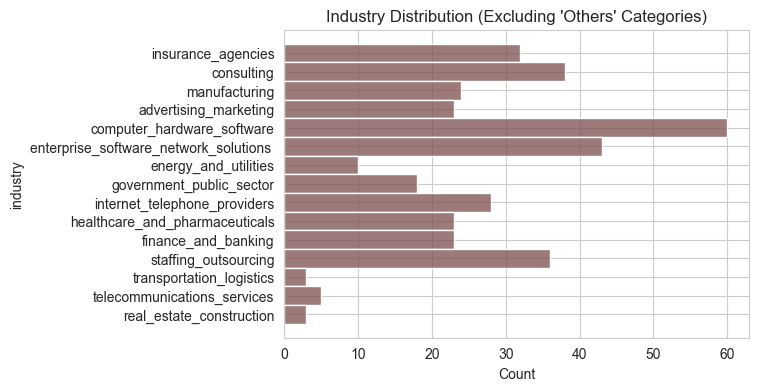

In [81]:
#filtering the non relevant data
relevant_df_industry =  df_final[ df_final['industry'] != 'others']

#setting the style
sns.set_palette("pink")
sns.set_style("whitegrid")

#plotting
plt.figure(figsize=(6, 4))
sns.histplot(data=relevant_df_industry, y='industry')
plt.title("Industry Distribution (Excluding 'Others' Categories)")
plt.show()

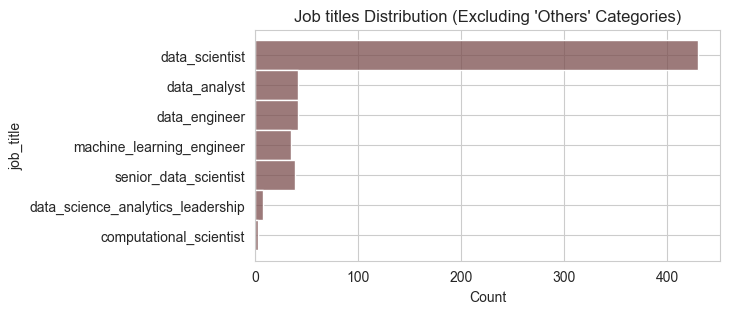

In [82]:
relevant_job =  df_final[ df_final['job_title'] != 'others']

plt.figure(figsize=(6, 3))
sns.histplot(data=relevant_job, y='job_title')
plt.title("Job titles Distribution (Excluding 'Others' Categories)")
plt.show()

<Figure size 2000x2000 with 0 Axes>

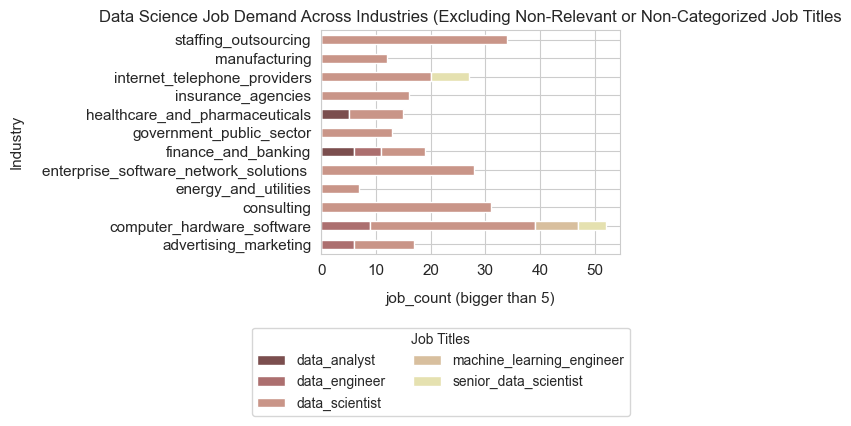

In [83]:

# groupping, excluding the non-relevant values and filtering the job counts less than 5
relevand_df_jobtitle_industry=relevant_df_industry[relevant_df_industry['job_title']!='others']
relevand_df_jobtitle_industry.groupby('industry')['job_title'].value_counts().reset_index(name='job_count (bigger than 5)').sort_values(by='job_count (bigger than 5)',ascending=False)
df_job_industy= relevand_df_jobtitle_industry.groupby('industry')['job_title'].value_counts().reset_index(name='job_count (bigger than 5)').sort_values(by='job_count (bigger than 5)',ascending=False)
df_job_industy=df_job_industy[df_job_industy['job_count (bigger than 5)']>=5].reset_index().drop(columns='index')

# Ploting the information 
plt.figure(figsize=(20, 20))

# Pivoting: job_titles as columns and industries as rows
pivot_df = df_job_industy.pivot(index='industry', columns='job_title', values='job_count (bigger than 5)')

# Plot
pivot_df.plot(kind='barh', stacked=True, fontsize=11)  # Adjust font size
plt.xlabel('job_count (bigger than 5)', fontsize=11,labelpad=10)  # Adjust font size
plt.ylabel('Industry', fontsize=11,labelpad=13)  # Adjust font size
plt.title('Data Science Job Demand Across Industries (Excluding Non-Relevant or Non-Categorized Job Titles', fontsize=12)  # Adjust font size
plt.legend(title='Job Titles', loc='upper center', bbox_to_anchor =(0.4, -0.3), ncol=2, fontsize=10)  
plt.tight_layout()
plt.show()

#
#### 2- Do company size and revenue levels influence salary estimations among the companies in the dataset?

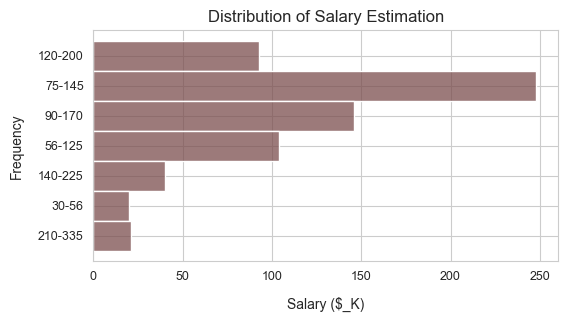

In [84]:
#plot adjustments, size and colurs 

plt.figure(figsize=(6,3))
sns.histplot(data=df_final, y='salary_$_K')
plt.title('Distribution of Salary Estimation',fontsize=12)
#axis_lables size and distance
plt.xlabel('Salary ($_K)', fontsize=10, labelpad=10) 
plt.ylabel('Frequency', fontsize=10, labelpad=10)
#lables fonts 
plt.xticks(fontsize=9)  
plt.yticks(fontsize=9) 
plt.show()

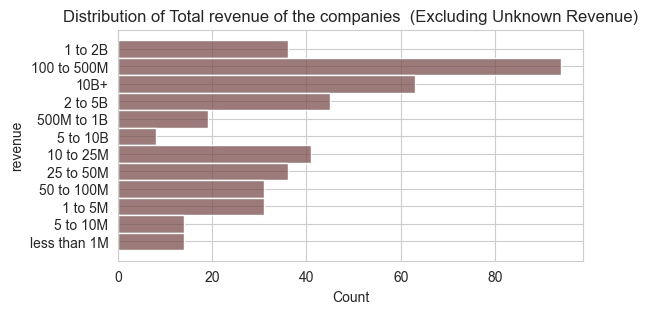

In [85]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df_final[df_final.revenue != 'unknown_non_applicable'], y='revenue')
plt.title('Distribution of Total revenue of the companies  (Excluding Unknown Revenue)')
plt.show()

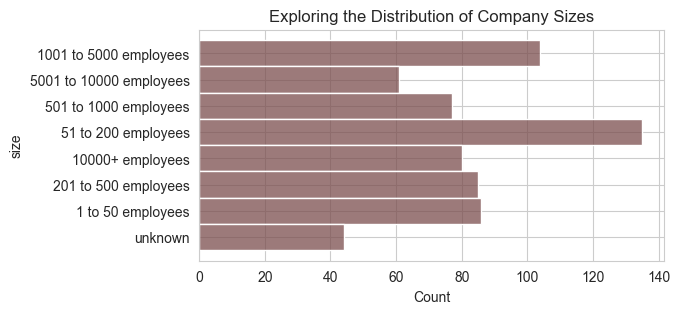

In [86]:
plt.figure(figsize=(6,3))
sns.histplot(data=df_final, y='size')
plt.title('Exploring the Distribution of Company Sizes')
plt.show()

In [87]:
# Filtering the columns
col_sal_revenue=['salary_$_K','revenue']
df_sal_revenue=df_final[col_sal_revenue]

# Filtering out rows with revenue 'unknown_non_applicable'
df_sal_revenue =  df_sal_revenue[ df_sal_revenue['revenue'] != 'unknown_non_applicable']

# Grouping
df_sal_revenue = df_sal_revenue.groupby(['salary_$_K', 'revenue']).count().reset_index()

# Sorting based on the sallaries lower range
df_sal_revenue['salary_sorted'] = df_sal_revenue['salary_$_K'].apply(lambda x: int(x.split('-')[0]))
df_sal_revenue= df_sal_revenue.sort_values(by=['revenue','salary_sorted'], ascending=[False, False])
df_sal_revenue3= df_sal_revenue.sort_values(by=['salary_sorted','revenue'], ascending=[False, False]).drop(columns=['salary_sorted'])
print('\nSorting the groupped data based on the salaries, excluding the unknown and non_applicable\n')
display(df_sal_revenue3)



Sorting the groupped data based on the salaries, excluding the unknown and non_applicable



salary_$_K       revenue
28    210-335  less than 1M
27    210-335    500M to 1B
26    210-335      5 to 10M
25    210-335     25 to 50M
24    210-335       2 to 5B
..        ...           ...
33      30-56          10B+
32      30-56   100 to 500M
31      30-56     10 to 25M
30      30-56       1 to 5M
29      30-56       1 to 2B

[73 rows x 2 columns]

In [88]:
# filtering based on columns
col_sal_size_revenue=['salary_$_K', 'size','revenue']
df_size_sal=df_final[col_sal_size_revenue]

# Filtering out rows with revenue 'unknown_non_applicable'
df_size_sal =  df_size_sal[ df_size_sal['revenue'] != 'unknown_non_applicable']
# Grouping
df_size_sal = df_size_sal.groupby(['salary_$_K', 'revenue'])['size'].count().reset_index(name='size_count')
df_size_sal.reset_index().drop(columns='index')

# Sorting based on the sallaries based on index0 (lower range in the estimation)
df_size_sal2 = df_size_sal.copy()
df_size_sal2['salary_sorted'] = df_size_sal2['salary_$_K'].apply(lambda x: int(x.split('-')[0]))
df_size_sal2 = df_size_sal2.sort_values(by=['size_count'], ascending= False).drop(columns=['salary_sorted'])
df_size_sal2 = df_size_sal2.reset_index(drop=True)
display(df_size_sal2)


salary_$_K       revenue  size_count
0      75-145   100 to 500M          26
1      75-145     10 to 25M          21
2      75-145          10B+          21
3      90-170   100 to 500M          20
4      56-125   100 to 500M          19
..        ...           ...         ...
68      30-56       1 to 5M           1
69      30-56     10 to 25M           1
70      30-56          10B+           1
71     56-125      5 to 10B           1
72     90-170  less than 1M           1

[73 rows x 3 columns]

<Figure size 1000x1000 with 0 Axes>

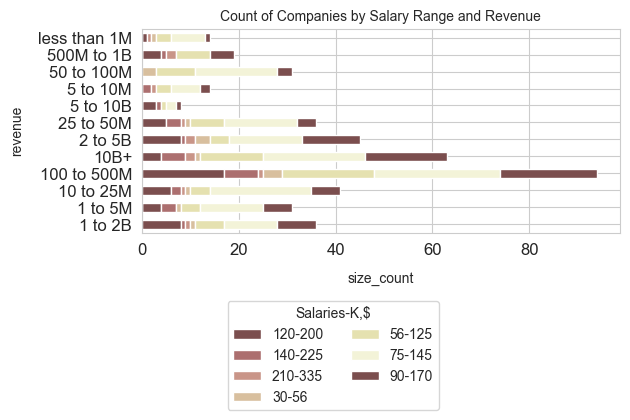

In [89]:
plt.figure(figsize=(10, 10))

# Pivoting the DataFrame to have job_titles as columns and industries as rows
pivot_df_sal = df_size_sal2.pivot(index='revenue', columns='salary_$_K', values='size_count')

# Plot the data
pivot_df_sal.plot(kind='barh', stacked=True, fontsize=12)  # Adjust font size
plt.xlabel('size_count', fontsize=10,labelpad=10)  # Adjust font size
plt.ylabel('revenue', fontsize=10,labelpad=10)  # Adjust font size
plt.title('Count of Companies by Salary Range and Revenue', fontsize=10)  # Adjust font size
plt.legend(title='Salaries-K,$', loc='upper center', bbox_to_anchor =(0.4, -0.3), ncol=2, fontsize=10)  
plt.tight_layout()
plt.show()

#### 3- Are there geographic regions where the open positions are more prevalent?

In [90]:
df_location = df_final.groupby(['location'])['size'].count().reset_index(name='companies in each location').sort_values(by='companies in each location', ascending=False)
display(df_location )

location  companies in each location
162  san francisco, ca                          69
119       new york, ny                          50
194     washington, dc                          26
19          boston, ma                          24
37         chicago, il                          22
..                 ...                         ...
68         fremont, ca                           1
126       oakville, ca                           1
69         gahanna, oh                           1
71      germantown, md                           1
206         yakima, wa                           1

[207 rows x 2 columns]

In [91]:
df_location = df_final.groupby(['headquarters'])['size'].count().reset_index(name='headquarters in each location').sort_values(by='headquarters in each location', ascending=False)
display(df_location )

headquarters  headquarters in each location
142         new york, ny                             33
137                  nan                             31
178    san francisco, ca                             31
46           chicago, il                             23
27            boston, ma                             19
..                   ...                            ...
93           holyoke, ma                              1
94          honolulu, hi                              1
98           ipswich, ma                              1
100           irving, tx                              1
228  zurich, switzerland                              1

[229 rows x 2 columns]

In [92]:
df_location_head = df_final.groupby(['location','headquarters'])['size'].count().reset_index(name='companies in each location').sort_values(by='companies in each location', ascending=False)
#df_size_sal = df_size_sal.groupby(['salary_$_K', 'revenue'])['size'].count().reset_index(name='size_count').sort_values(by='salary_$_K', ascending=False)
display(df_location_head )

location               headquarters  \
291     san francisco, ca          san francisco, ca   
199          new york, ny               new york, ny   
33             boston, ma                 boston, ma   
287     san francisco, ca                        nan   
69            chicago, il                chicago, il   
..                    ...                        ...   
80   colorado springs, co            los angeles, ca   
213           norwell, ma               columbus, oh   
79       collegeville, pa  brentford, united kingdom   
215           oakland, ca              santa ana, ca   
378            yakima, wa                 yakima, wa   

     companies in each location  
291                          25  
199                          22  
33                           16  
287                          16  
69                           14  
..                          ...  
80                            1  
213                           1  
79                            1  
215                           1  
378                           1  

[379 rows x 3 columns]

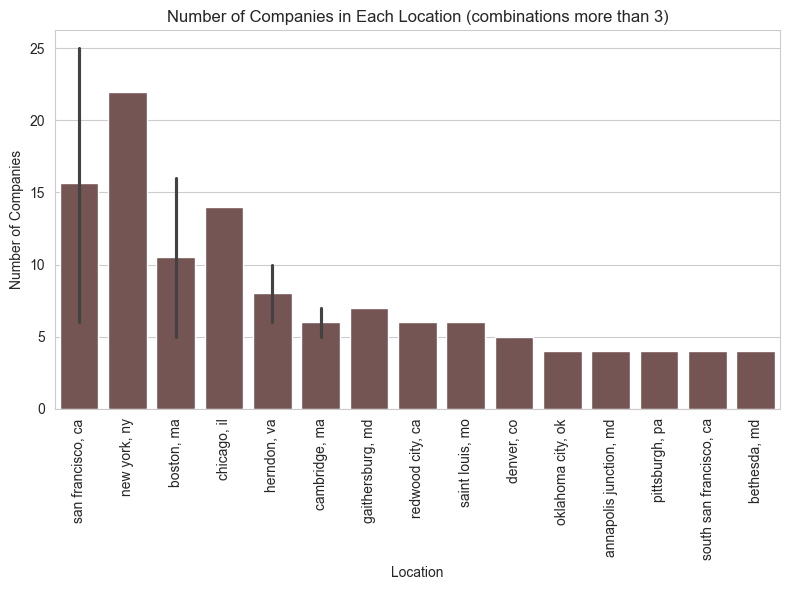

In [93]:
# filtered DataFrame >3
df_filtered_locations = df_location_head[df_location_head['companies in each location'] > 3]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filtered_locations, x='location', y='companies in each location')
plt.xlabel('Location')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each Location (combinations more than 3)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_final.to_csv('final_data.csv', index=False)

if__name__=="__main__":
    general_cleaning(df)
    cleaning_job_title(job_title)
    cleaning_industry(industry)
    cleaning_salary(salary)
    cleaning_locations(location)
    cleaning_headquarters(location)
    cleaning_companies(company)